In [58]:
import numpy as np
import pandas as pd

In [60]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [62]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [64]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [66]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [68]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [72]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()

In [78]:
df['target'] = le.fit_transform(df['target'])

In [82]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['target']

In [102]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [104]:
model = MultinomialNB()

In [106]:
model.fit(x_train,y_train)

MultinomialNB()

In [108]:
y_pred= model.predict(x_test)

In [112]:
print("Accuracy score:",accuracy_score(y_test,y_pred))

Accuracy score: 0.97847533632287


In [114]:
print("Classification Report:",classification_report(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [116]:
sample = ["Congratulations! You've won a free ticket to Bahamas!"]
sample_vec = vectorizer.transform(sample)
print("Prediction:", model.predict(sample_vec))  # 1 = spam, 0 = ham


Prediction: [1]


In [118]:
sample = ["hey,How are you doing"]
sample_vec = vectorizer.transform(sample)
print("Prediction:", model.predict(sample_vec))  # 1 = spam, 0 = ham


Prediction: [0]


In [120]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [124]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Tokenize
    words = text.split()
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['clean_text'])


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [136]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [138]:
lr = LogisticRegression()

In [140]:
lr.fit(x_train,y_train)

LogisticRegression()

In [144]:
y_pred = lr.predict(x_test)

In [150]:
print("Logistic Regression:\n", classification_report(y_test, y_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1453
           1       0.96      0.58      0.72       219

    accuracy                           0.94      1672
   macro avg       0.95      0.79      0.85      1672
weighted avg       0.94      0.94      0.94      1672



In [152]:
from sklearn.ensemble import RandomForestClassifier


In [154]:
rf = RandomForestClassifier()

In [156]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [160]:
print("Random Forest Classifer:\n", classification_report(y_test,y_pred))

Random Forest Classifer:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.81      0.90       219

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



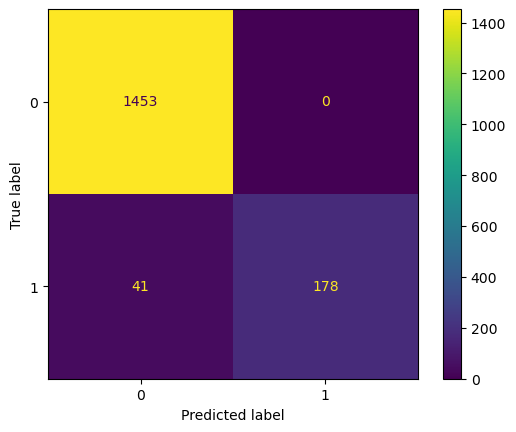

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)  # or pred_lr
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
